## Making plotting functions for the outputs of Sex chromosome recomb evolution simulations. 

In [335]:
def Logplotter(logfile_dir, Stat_to_plot):
    
    """
    Plots outputs from Sex chromosome recombination evolution simulations
    
    logfile_dir    - The absolute path to the directory containing all logfiles from simultions to be plotted
                     (Note all simulations must have identical number of generations and windows)
    Stat_to_plot   - A string to determine the statistic to plot. The string must be in the name of the logfile and 
                     must be unique to that type of logfile. e.g. "Fst", "Dxy", "XX", "XY"
    
    
    """
    
    
    
    import os
    import numpy as np
    from matplotlib import pyplot as plt
    import matplotlib.colors as colors
    import matplotlib.cm as cmx
    import matplotlib.colorbar as cb


    ## Get files, generation and window numbers. 

    logfiles = []

    for logfile in os.listdir(logfile_dir):
        if Stat_to_plot in logfile:
            logfiles.append("%s/%s" % (logfile_dir, logfile))

    ## Get the number of generations
    generations = []

    for line in open(logfiles[0], 'r').readlines():
        if not any(["site" in line, "generation" in line]):
            generations.append(int(line.split()[0]))


    ## Get the windows

    for line in open(logfiles[0], 'r').readlines():
        if "generation" in line:
            windows = line.split()[2:]

    ## Note - all the files in the simulation directory must have the same generation and window number!



    ## Set up the dictionary that will contain all the data

    Raw_data_by_gen = {}

    for gen in generations:
        Raw_data_by_gen[gen] = {}

        for window in windows:
            Raw_data_by_gen[gen][window] = []


    ## Now get data. Could probably do this easier with pandas, but going to hack it just with base python. 

    for logfile in logfiles:
        for line in open(logfile, 'r').readlines():
            if not any(["site" in line, "generation" in line]):
                generation = int(line.split()[0])
                data_fields = line.split()[2:]
                field_index = 0


                for field in data_fields:
                    window = windows[field_index]
                    if field == "nan":
                        Raw_data_by_gen[generation][window].append(0)
                    else:
                        Raw_data_by_gen[generation][window].append(float(field))
                    field_index += 1



    ## Now get the averages

    Averaged_data_by_gen = {}

    for gen in Raw_data_by_gen:
        Averaged_data_by_gen[gen] = {}
        for window in Raw_data_by_gen[gen]:
            Averaged_data_by_gen[gen][window] = np.average(Raw_data_by_gen[gen][window])



    ### Now for the plotting  ###

    fig = plt.figure(figsize = (20,10))

    ax1 = plt.subplot()

    ## make some pretty colours

    BuPu = plt.get_cmap("BuPu")
    cNorm  = colors.Normalize(vmin=min(generations)-500, vmax=max(generations))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=BuPu)

    colour_index = 0
    for gen in generations: ## use generations list for iteration as its in order. Same for windows below.
        gen_data = []
        for window in windows:  
            gen_data.append(Averaged_data_by_gen[gen][window])

        colorVal = scalarMap.to_rgba(generations[colour_index])

        ax1.plot(gen_data, color=colorVal, label = gen ) #, cmap = "BuPu")

        colour_index += 1

    ## remove extra axes
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.patch.set_visible(False)
    ax1.set_title(Stat_to_plot)
    ax1.set_xticks(range(0,len(windows), 5))
    ax1.set_xticklabels(windows[::5],rotation = 30) 
    ax1.set_ylabel("%s (averaged over %s iterations)" % (Stat_to_plot, len(logfiles)))
    ax1.set_xlabel("Window")

    cb_inset = fig.add_axes([0.65,0.9,0.2,0.05])
    cb_inset.set_title("Generations")
    cb_inset.imshow((generations,generations), cmap=BuPu, extent=[min(generations),max(generations),0,100])
    #cb_inset.spines["left"].set_visible(False)
    cb_inset.axes.get_yaxis().set_visible(False)
    #plt.legend(ncol = 2)

    plt.show()


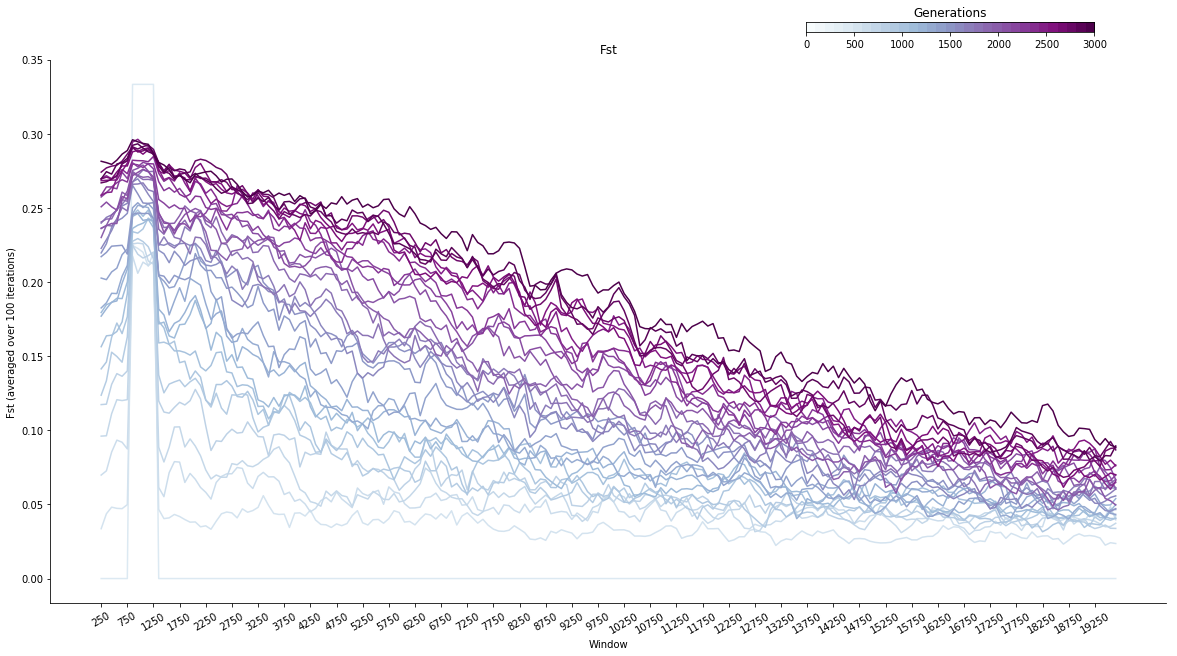

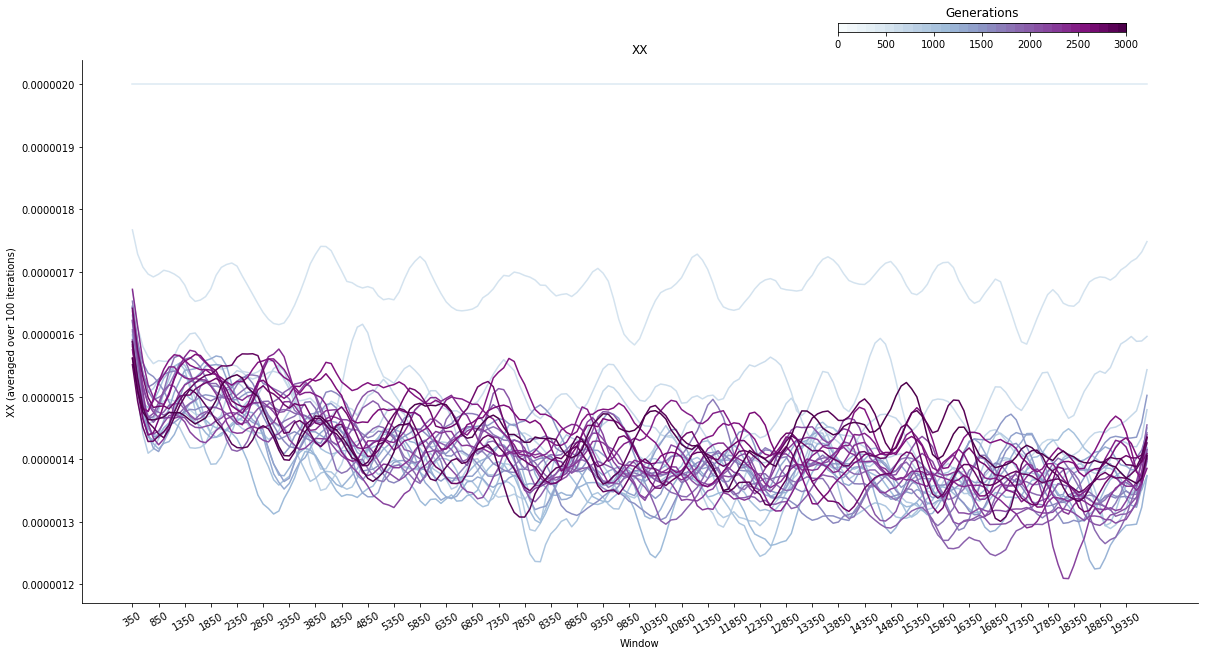

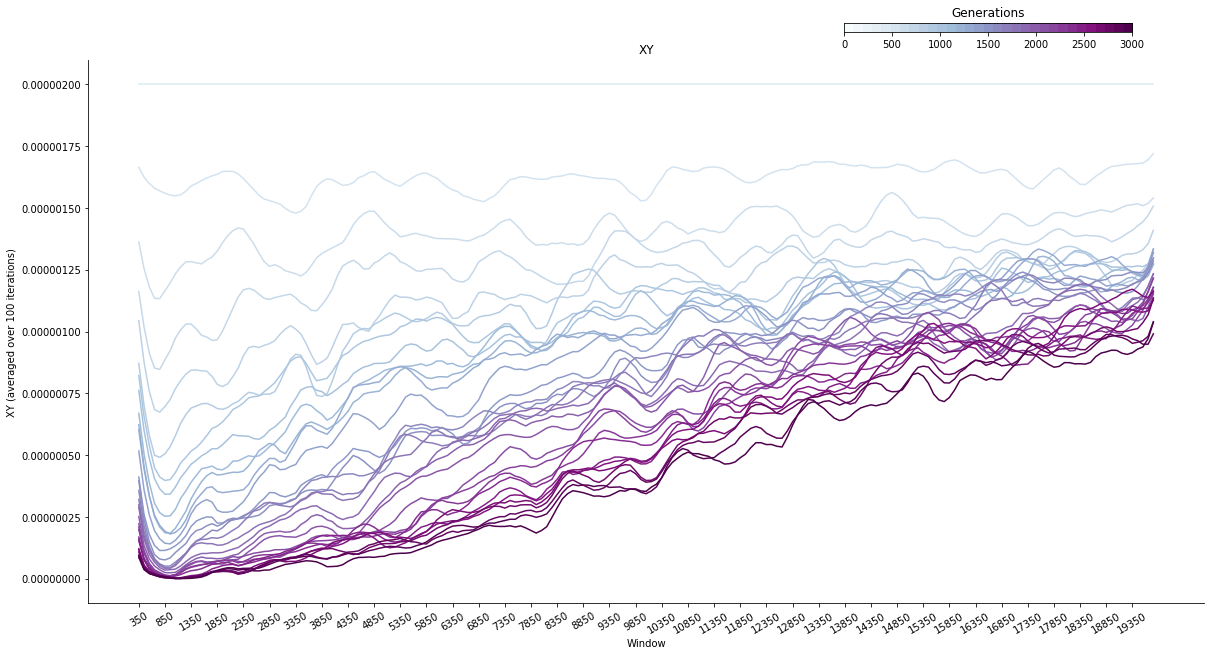

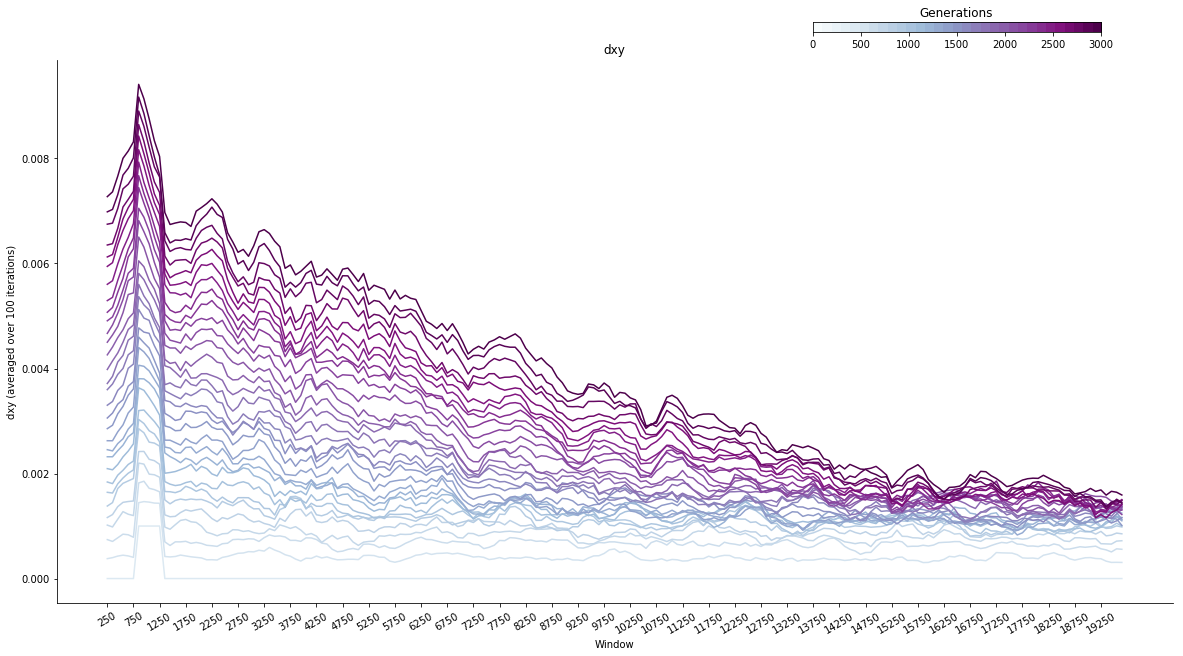

In [336]:
working_dir = "/home/djeffrie/Data/SexRecEvo/sexrecevo/Plotting_Dan/example.100_iterations.2019-06-05"
statistics = ["Fst", "XX", "XY", "dxy"]

for statistic in statistics:
    Logplotter(working_dir,statistic)